# Analisis Klasifikasi Penyakit Jantung (Heart Disease)

### 1. Import Library
Tahap pertama adalah memuat semua library yang dibutuhkan untuk manipulasi data, visualisasi, dan pemodelan.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Pemodelan & Evaluasi dari Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Konfigurasi visualisasi
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

### 2. Import Dataset
Memuat dataset dari file Excel dan melihat struktur data awal.

In [96]:
# Membaca file dataset
try:
    df = pd.read_excel('heart_desease.xlsx')
    print("Dataset berhasil dimuat.")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat data: {e}")

df.columns = df.columns.str.strip()

# Ganti '?' dengan NaN
df.replace('?', np.nan, inplace=True)

# Menampilkan 5 baris pertama data
df.head()

Dataset berhasil dimuat.


C:\Users\jmjur\AppData\Local\Temp\ipykernel_11500\1288000703.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_predicted
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


## 3. Exploratory Data Analysis (EDA)
Melakukan analisis eksploratif untuk memahami distribusi data, mencari korelasi, dan melihat keseimbangan kelas target.

### 3.1 Univariate Analysis
Analisis distribusi untuk setiap fitur individu.

In [97]:
# Memisahkan kolom kategorikal dan numerikal
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target_col = 'num_predicted'

print(f"Categorical Columns: {categorical_cols}")
print(f"Numerical Columns: {numerical_cols}")

Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Numerical Columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


#### Visualisasi Fitur Kategorikal
Melihat frekuensi setiap kategori.

C:\Users\jmjur\AppData\Local\Temp\ipykernel_11500\3368539540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
C:\Users\jmjur\AppData\Local\Temp\ipykernel_11500\3368539540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
C:\Users\jmjur\AppData\Local\Temp\ipykernel_11500\3368539540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
C:\Users\jmjur\AppData\Local\Temp\ipykernel_11500\3368539540.

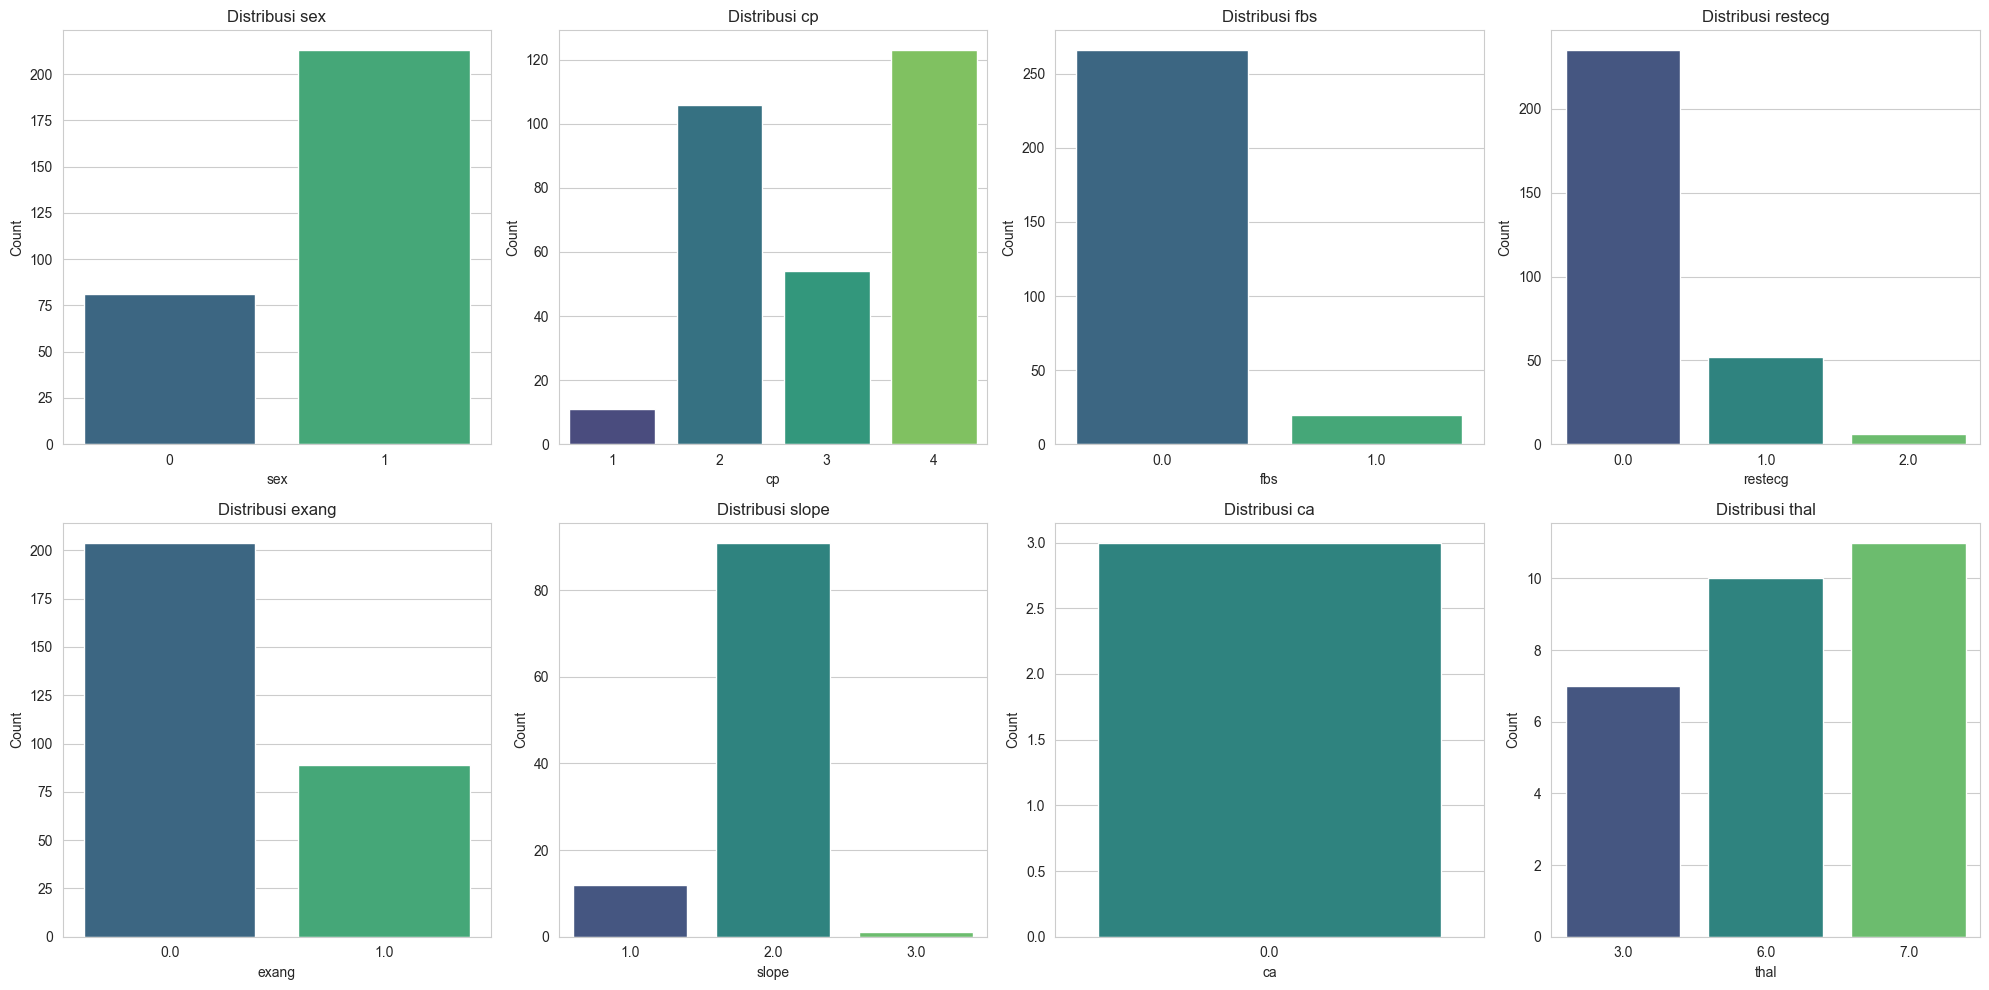

In [98]:
# Plot Distribusi Fitur Kategorikal
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Visualisasi Fitur Numerikal
Melihat distribusi data numerik (Histogram & Boxplot).

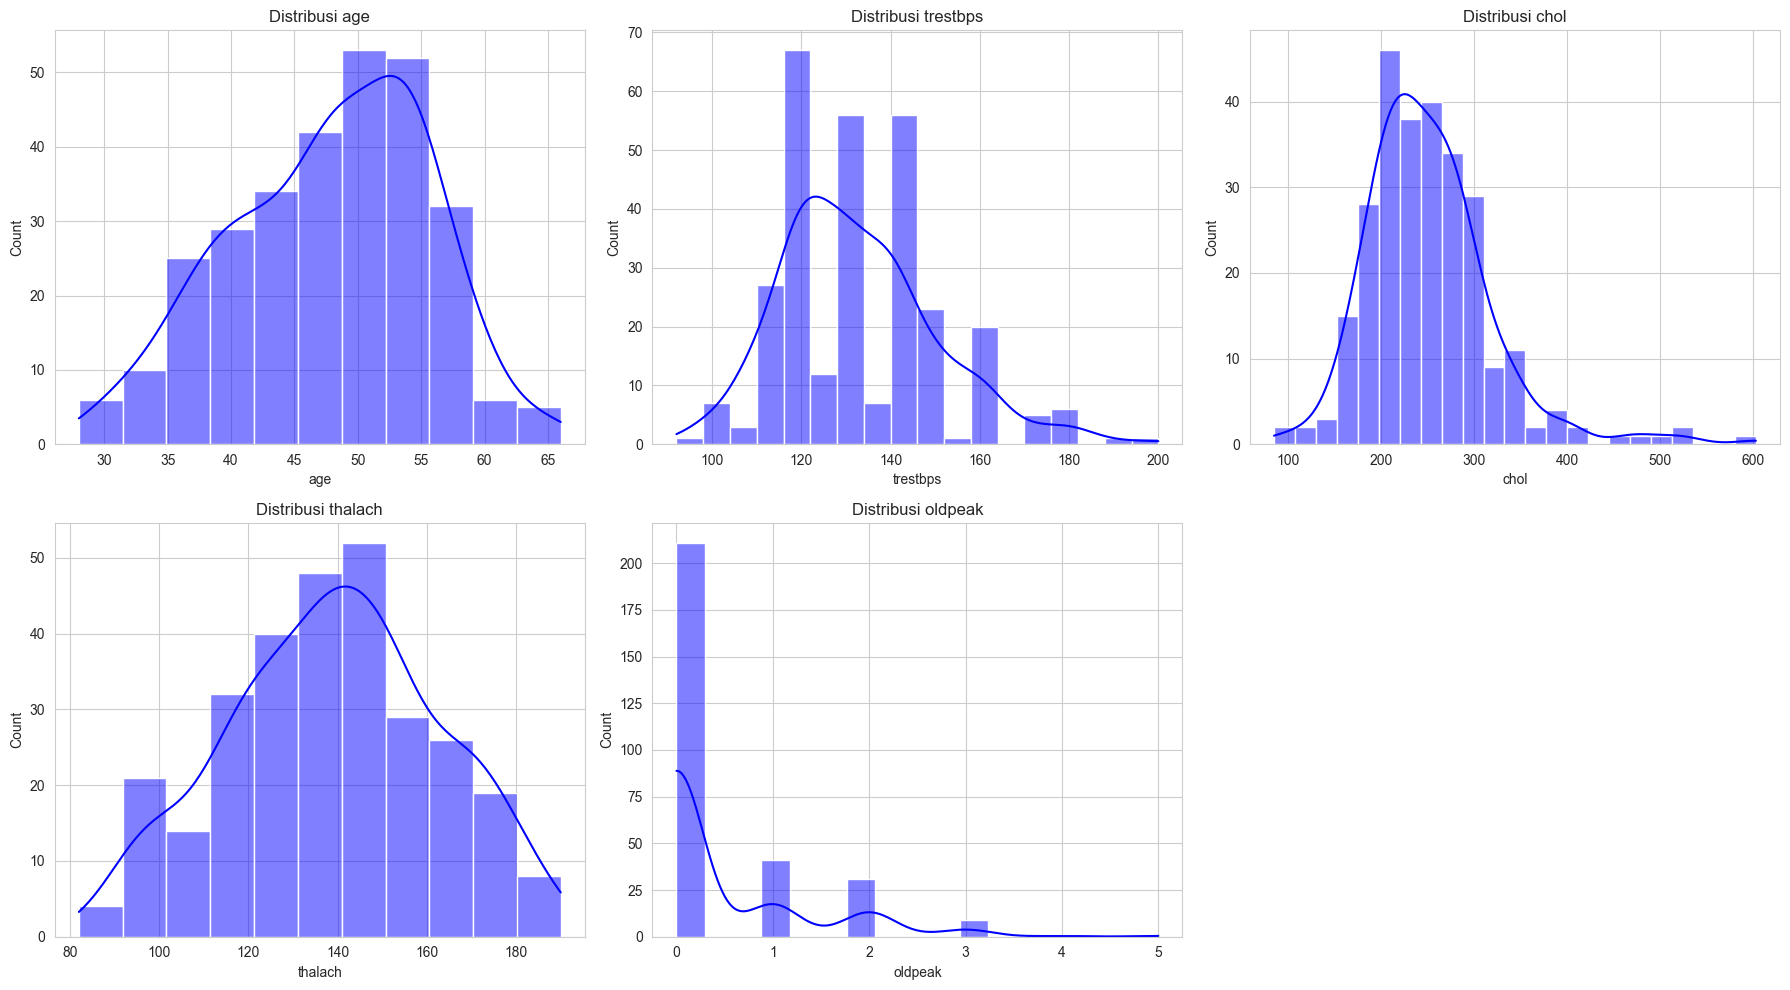

In [99]:
# Plot Distribusi Fitur Numerikal
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribusi {col}')

# Hapus axes kosong jika ada
if len(numerical_cols) < len(axes):
    for j in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3.2 Bivariate Analysis
Menganalisis hubungan antara fitur dengan target (Penyakit Jantung).

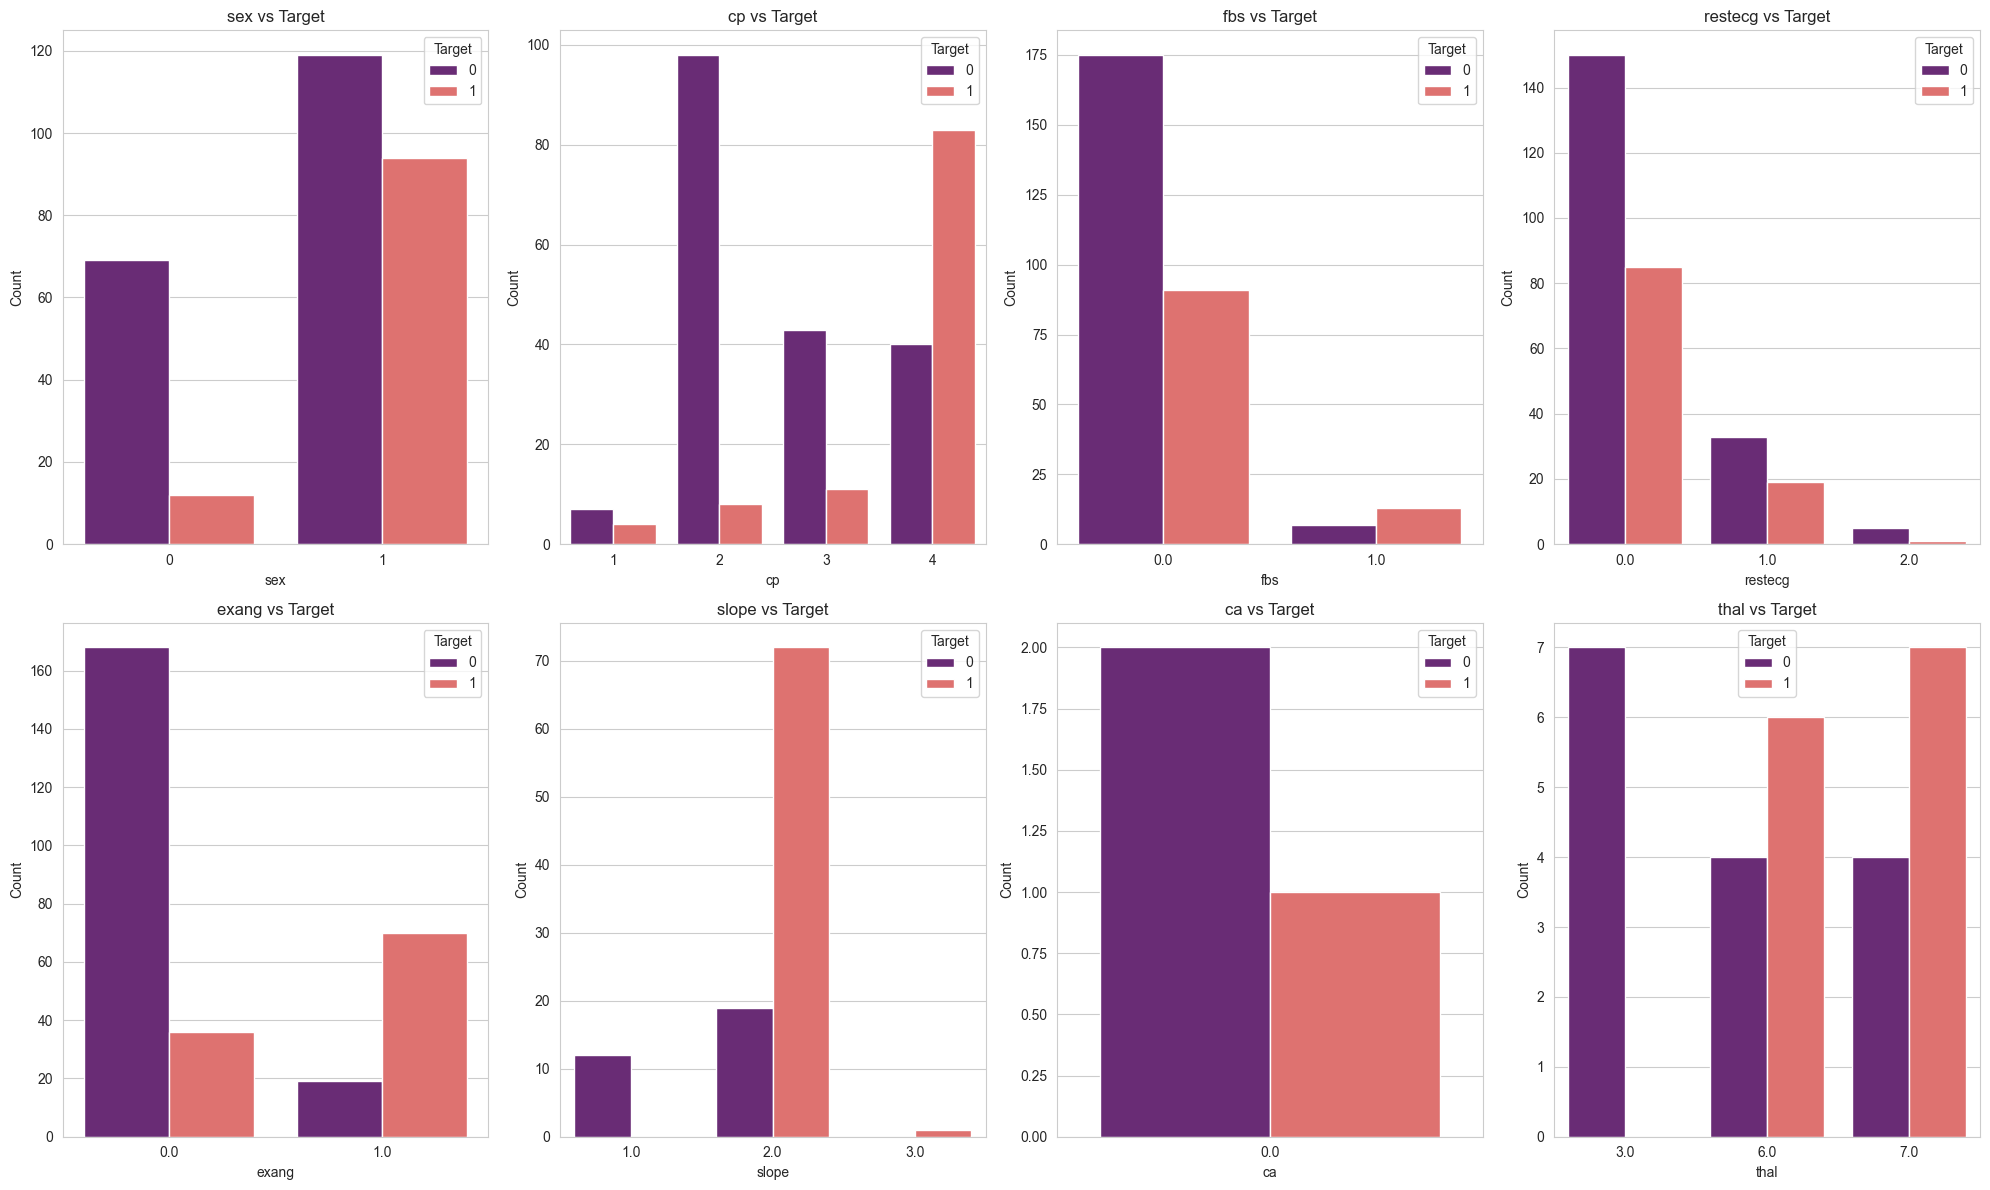

In [100]:
# Hubungan Fitur Kategorikal dengan Target
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue=target_col, data=df, palette='magma', ax=axes[i])
    axes[i].set_title(f'{col} vs Target')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target')

plt.tight_layout()
plt.show()

C:\Users\jmjur\AppData\Local\Temp\ipykernel_11500\95488452.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='coolwarm', ax=axes[i])
C:\Users\jmjur\AppData\Local\Temp\ipykernel_11500\95488452.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='coolwarm', ax=axes[i])
C:\Users\jmjur\AppData\Local\Temp\ipykernel_11500\95488452.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='coolwarm', ax=axes[i])
C:\Users\jmjur\AppData\Local

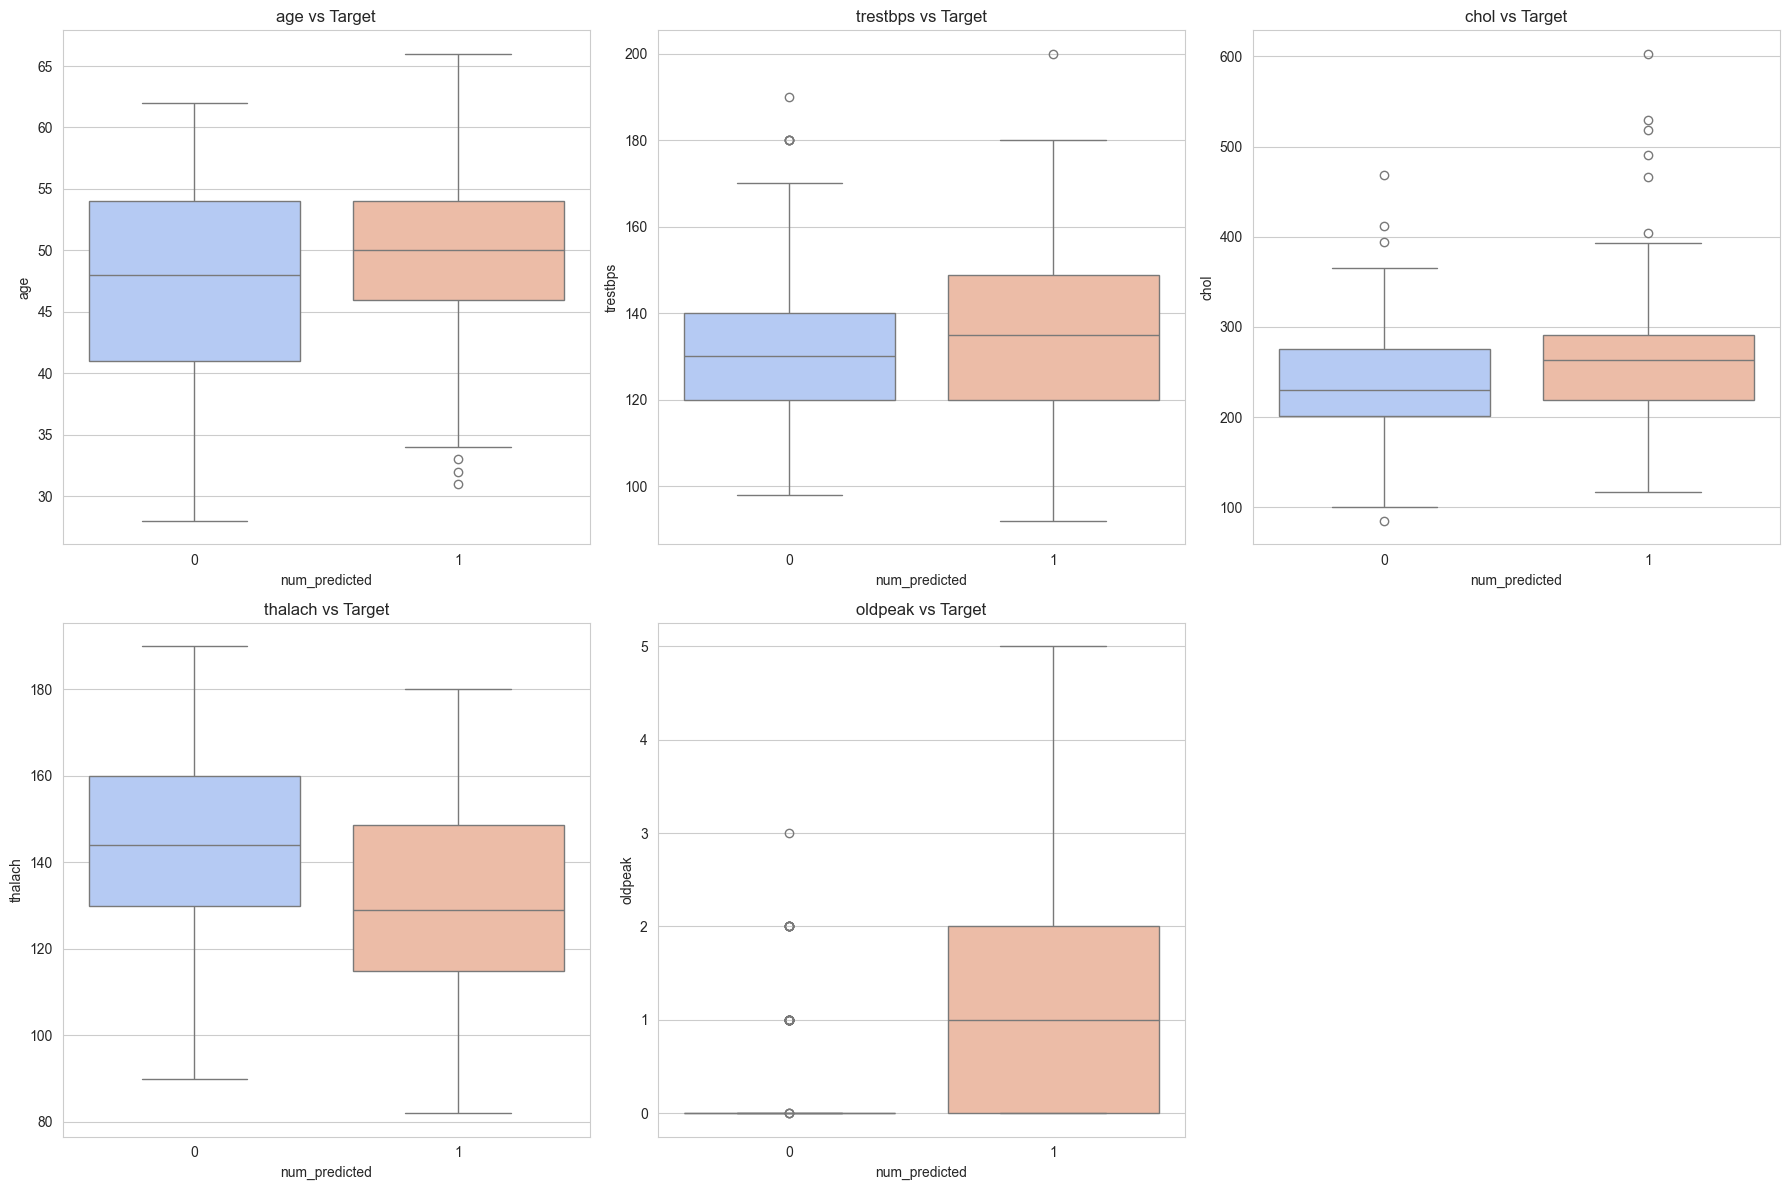

In [101]:
# Hubungan Fitur Numerikal dengan Target (Boxplot)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=target_col, y=col, data=df, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'{col} vs Target')

if len(numerical_cols) < len(axes):
    for j in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3.3 Correlation Analysis
Melihat korelasi antar fitur numerik untuk mengidentifikasi multikolinearitas.

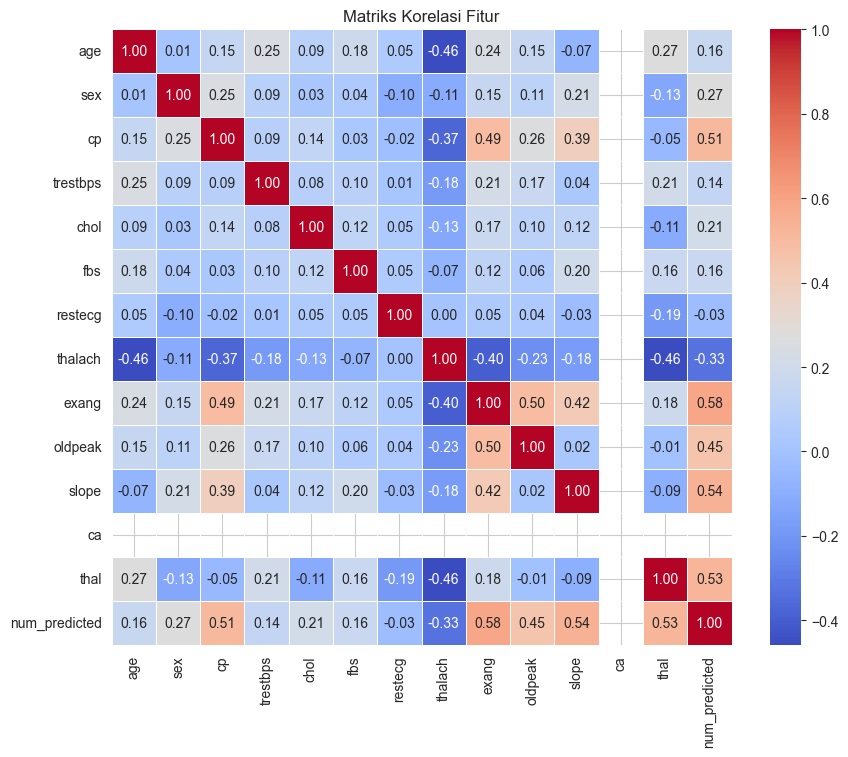

In [102]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi Fitur')
plt.show()

## 4. Preprocessing
Tahap pra-pemrosesan data meliputi penanganan *missing values*, *balancing* data, *encoding* variabel kategori, pembagian data latih/uji, dan *scaling*.

In [103]:
# 4.1 Handling Missing Values
# Strategi: Drop kolom dengan banyak missing values, lalu dropna baris sisanya.
print("Missing values sebelum handling:")
print(df.isnull().sum())

# Kolom 'slope', 'ca', 'thal' memiliki banyak missing values (>50%).
# Kita drop kolom ini agar tidak kehilangan terlalu banyak baris saat dropna.
columns_to_drop = ['slope', 'ca', 'thal']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

# Drop baris untuk missing values yang tersisa
df_clean = df_clean.dropna()
print(f"\nUkuran data setelah cleaning: {df_clean.shape}")

Missing values sebelum handling:
age                0
sex                0
cp                 0
trestbps           1
chol              23
fbs                8
restecg            1
thalach            1
exang              1
oldpeak            0
slope            190
ca               291
thal             266
num_predicted      0
dtype: int64

Ukuran data setelah cleaning: (261, 11)


In [104]:
# 4.2 Balancing Data (Jika Diperlukan)
# Menggunakan metode Resampling (Oversampling) agar kelas minoritas seimbang dengan mayoritas.

counts = df_clean[target_col].value_counts()
major_class = counts.idxmax()
minor_class = counts.idxmin()

df_major = df_clean[df_clean[target_col] == major_class]
df_minor = df_clean[df_clean[target_col] != major_class]

# Cek apakah perlu balancing (jika rasio ketimpangan cukup besar)
if len(df_minor) < len(df_major):
    print("\nMelakukan Oversampling pada kelas minoritas...")
    df_minor_upsampled = resample(df_minor,
                                  replace=True,
                                  n_samples=len(df_major),
                                  random_state=42)
    df_balanced = pd.concat([df_major, df_minor_upsampled])
else:
    print("\nData sudah seimbang, tidak perlu oversampling.")
    df_balanced = df_clean.copy()

print("Distribusi kelas setelah balancing:")
print(df_balanced[target_col].value_counts())


Melakukan Oversampling pada kelas minoritas...
Distribusi kelas setelah balancing:
num_predicted
0    163
1    163
Name: count, dtype: int64


In [105]:
# 4.3 Encoding & Splitting Data
# Memisahkan fitur (X) dan target (y)
X = df_balanced.drop(columns=[target_col])
y = df_balanced[target_col]

# One-Hot Encoding untuk variabel kategorikal
X = pd.get_dummies(X, drop_first=True)

# Membagi data menjadi Training (70%) dan Testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)

# 4.4 Feature Scaling (StandardScaler)
# Penting untuk algoritma berbasis jarak/optimasi seperti SVM dan Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimensi X_train: (228, 10)
Dimensi X_test: (98, 10)


## 5. Modeling & Evaluasi
Pada tahap ini, kita akan membangun model dan **langsung mengevaluasinya** untuk melihat performa masing-masing algoritma.

In [106]:
# Fungsi Bantuan untuk Evaluasi (Dijalankan sekali, digunakan berulang)
def evaluasi_model(nama_model, y_test, y_pred):
    print(f"\n========== Evaluasi Model: {nama_model} ==========")
    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Visualisasi Confusion Matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {nama_model}')
    plt.show()
    return acc

# Dictionary untuk menyimpan skor akurasi
hasil_akurasi = {}

--- Training Model SVM ---
Selesai.

========== Evaluasi Model: SVM ==========
Akurasi: 0.7755

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        51
           1       0.79      0.72      0.76        47

    accuracy                           0.78        98
   macro avg       0.78      0.77      0.77        98
weighted avg       0.78      0.78      0.77        98

Confusion Matrix:


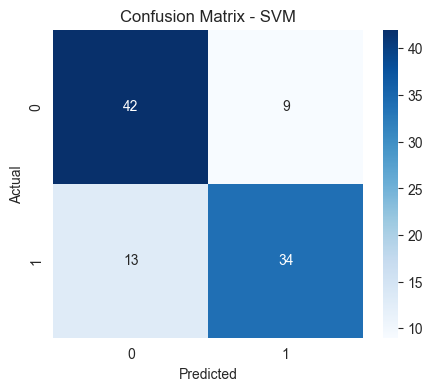

In [107]:
# Model 1: Support Vector Machine (SVM)
print("--- Training Model SVM ---")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print("Selesai.")

# Evaluasi Langsung
hasil_akurasi['SVM'] = evaluasi_model("SVM", y_test, y_pred_svm)

--- Training Model Naive Bayes ---
Selesai.

========== Evaluasi Model: Naive Bayes ==========
Akurasi: 0.7245

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        51
           1       0.73      0.68      0.70        47

    accuracy                           0.72        98
   macro avg       0.72      0.72      0.72        98
weighted avg       0.72      0.72      0.72        98

Confusion Matrix:


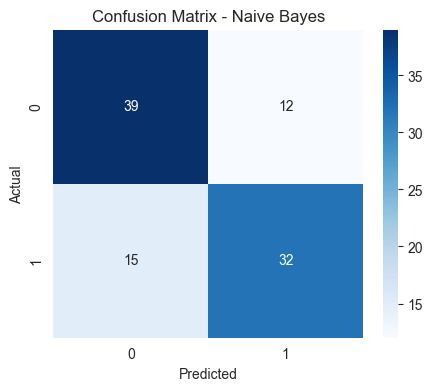

In [108]:
# Model 2: Naive Bayes
print("--- Training Model Naive Bayes ---")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
print("Selesai.")

# Evaluasi Langsung
hasil_akurasi['Naive Bayes'] = evaluasi_model("Naive Bayes", y_test, y_pred_nb)

--- Training Model Decision Tree (ID3) ---
Selesai.

========== Evaluasi Model: ID3 ==========
Akurasi: 0.7959

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        51
           1       0.73      0.91      0.81        47

    accuracy                           0.80        98
   macro avg       0.81      0.80      0.79        98
weighted avg       0.82      0.80      0.79        98

Confusion Matrix:


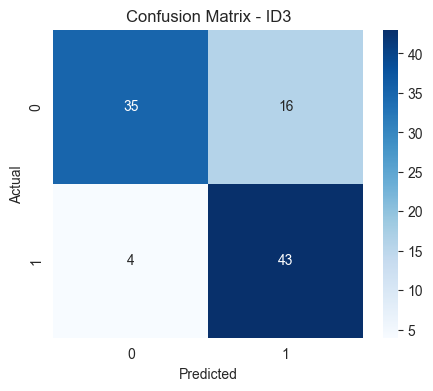

In [109]:
# Model 3: ID3 (Decision Tree)
print("--- Training Model Decision Tree (ID3) ---")
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
print("Selesai.")

# Evaluasi Langsung
hasil_akurasi['ID3 (Decision Tree)'] = evaluasi_model("ID3", y_test, y_pred_dt)

--- Training Model Random Forest ---
Selesai.

========== Evaluasi Model: Random Forest ==========
Akurasi: 0.8367

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82        51
           1       0.76      0.96      0.85        47

    accuracy                           0.84        98
   macro avg       0.86      0.84      0.84        98
weighted avg       0.86      0.84      0.84        98

Confusion Matrix:


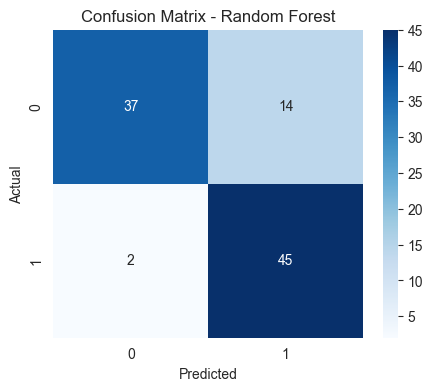

In [110]:
# Model 4: Random Forest
print("--- Training Model Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Selesai.")

# Evaluasi Langsung
hasil_akurasi['Random Forest'] = evaluasi_model("Random Forest", y_test, y_pred_rf)

--- Training Model Neural Network ---
Selesai.

========== Evaluasi Model: Neural Network ==========
Akurasi: 0.8265

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.81        51
           1       0.76      0.94      0.84        47

    accuracy                           0.83        98
   macro avg       0.84      0.83      0.83        98
weighted avg       0.85      0.83      0.83        98

Confusion Matrix:


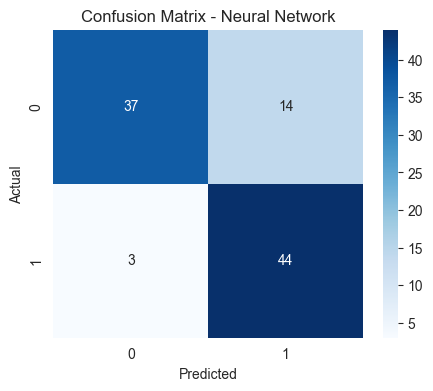

In [111]:
# Model 5: Neural Network (Multilayer Perceptron)
print("--- Training Model Neural Network ---")
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)
print("Selesai.")

# Evaluasi Langsung
hasil_akurasi['Neural Network'] = evaluasi_model("Neural Network", y_test, y_pred_nn)

### 6. Perbandingan Hasil Evaluasi Model
Membandingkan akurasi dari kelima model untuk menentukan model terbaik.

Tabel Peringkat Akurasi Model:
                 Model   Akurasi
3        Random Forest  0.836735
4       Neural Network  0.826531
2  ID3 (Decision Tree)  0.795918
0                  SVM  0.775510
1          Naive Bayes  0.724490


C:\Users\jmjur\AppData\Local\Temp\ipykernel_11500\1276599199.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Akurasi', y='Model', data=df_results, palette='magma')


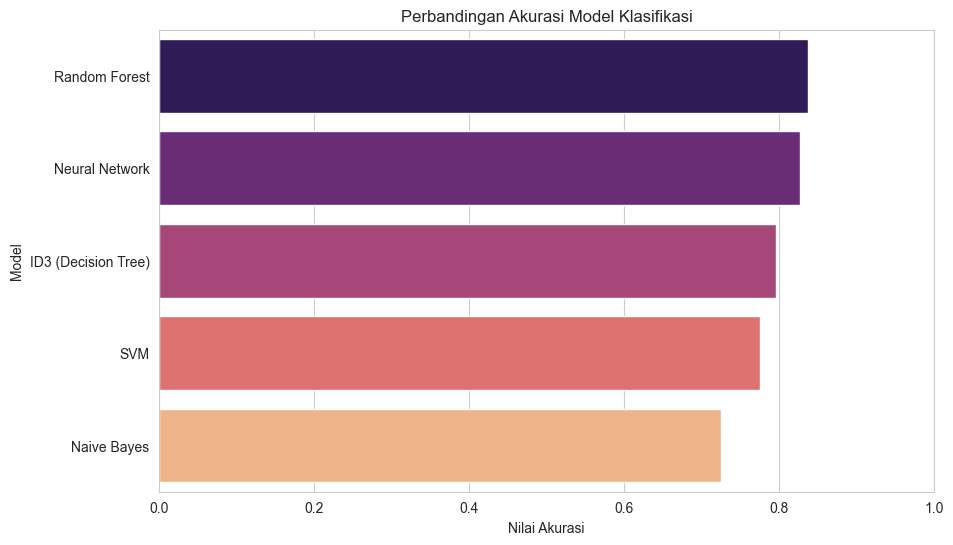

In [112]:
df_results = pd.DataFrame(list(hasil_akurasi.items()), columns=['Model', 'Akurasi'])
df_results = df_results.sort_values(by='Akurasi', ascending=False)

print("Tabel Peringkat Akurasi Model:")
print(df_results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Akurasi', y='Model', data=df_results, palette='magma')
plt.xlim(0, 1.0)
plt.title('Perbandingan Akurasi Model Klasifikasi')
plt.xlabel('Nilai Akurasi')
plt.show()

### 7. Kesimpulan Analisis

Berdasarkan eksperimen yang telah saya lakukan dari awal hingga akhir, berikut adalah kesimpulan dari setiap tahapan proses:

**1. Tahap Exploratory Data Analysis (EDA)**
Saat melakukan eksplorasi data, saya menemukan masalah krusial yaitu tingginya jumlah *missing values* pada kolom `slope`, `ca`, dan `thal` (lebih dari 50% data kosong). Selain itu, terlihat adanya ketidakseimbangan (*imbalance*) pada kelas target yang berpotensi membuat model menjadi bias.

**2. Tahap Preprocessing**
Untuk mengatasi masalah yang ditemukan saat EDA, saya melakukan beberapa penanganan:
*   **Penanganan Data Hilang:** Saya memutuskan untuk menghapus (*drop*) kolom `slope`, `ca`, dan `thal`. Keputusan ini diambil untuk menjaga jumlah sampel data latih agar tidak berkurang drastis jika harus menghapus baris.
*   **Data Balancing:** Menggunakan teknik *Oversampling* pada kelas minoritas agar proporsi data menjadi seimbang.
*   **Feature Scaling:** Menggunakan *StandardScaler* untuk menyamakan rentang nilai antar fitur numerik, yang sangat membantu performa model seperti SVM dan Neural Network.

**3. Hasil Modeling**
Setelah melatih dan menguji lima algoritma berbeda, didapatkan hasil sebagai berikut:
*   **Random Forest** memberikan performa terbaik dengan akurasi **83.7%**.
*   **Neural Network** berada di posisi kedua dengan akurasi **82.7%**.
*   **ID3 Decision Tree** (79.6%), **SVM** (77.6%), dan **Naive Bayes** (72.4%) memberikan hasil di bawahnya.

**Kesimpulan Akhir:**
Dari hasil perbandingan tersebut, **Random Forest** adalah algoritma yang paling direkomendasikan untuk dataset ini karena memiliki akurasi dan stabilitas paling tinggi dibandingkan model lainnya. Keberhasilan model ini sangat dipengaruhi oleh strategi *preprocessing* yang tepat, terutama dalam menangani atribut yang banyak hilang dan menyeimbangkan distribusi data.